<a href="https://colab.research.google.com/github/anushkagupta1307/IR2022_A2_27/blob/main/IR_Assignment2_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount the data files from google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import libraries
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
#reading file from the path and reading line by line and extracting lines only with qid:4- creating a dataframe
# with relevance score, qid and the score for frature 75
path="/content/drive/MyDrive/IR-assignment-2-data.txt"
file=open(path, 'r',encoding='ISO-8859-1')
read_lines=file.readlines()

counter=0
data_list=[]
for temp in read_lines:

  row_wise_data=temp.split(' ')
  input_dictionary={}

  if row_wise_data[1]=='qid:4':
    first_column=int(row_wise_data[0])
    
    input_dictionary['relevance score']=first_column
    second_column=(row_wise_data[1])
    input_dictionary['id']=second_column
    
    counter=counter+1

    #Extracting the score for feature 75
    for iterator in row_wise_data:
        temp_key_val= iterator.split(':') 
        if temp_key_val[0]=='75':
          input_dictionary['75']=float(temp_key_val[1])

    data_list.append(input_dictionary)
  
counter=str(counter)
print("number of lines with qid:4 is - "+counter)
  

number of lines with qid:4 is - 103


**Assignment2 Part A**

In [ ]:
df = pd.DataFrame(data_list)
df

,relevance score,id,75
0,0,qid:4,90.531710
1,0,qid:4,538.388954
2,0,qid:4,88.171761
3,0,qid:4,144.564444
4,1,qid:4,142.589323
...,...,...,...
98,0,qid:4,70.460443
99,1,qid:4,270.132330
100,2,qid:4,296.023694
101,1,qid:4,528.520116


In [ ]:
#getting the unique values of relevance scores
df['relevance score'].unique()

array([0, 1, 3, 2])

In [ ]:
len(df)

103

**Question 2 Part(B)**

In [ ]:
#sorting the dataframe based on relevance score
dataframe_sorted=df.sort_values('relevance score',ascending=False)
dataframe_sorted.to_csv('question2_partB.csv')

In [ ]:
dataframe_sorted

,relevance score,id,75
7,3,qid:4,411.010633
76,2,qid:4,108.548081
40,2,qid:4,192.953467
36,2,qid:4,217.848266
90,2,qid:4,311.705149
...,...,...,...
44,0,qid:4,148.415271
43,0,qid:4,148.415271
42,0,qid:4,169.844071
41,0,qid:4,212.401296


In [ ]:
#getting all the relevance scores in a list
relvance_list=[]
for i in range(len(dataframe_sorted)):
  relvance_list.append(dataframe_sorted['relevance score'][i])



In [ ]:
#sort the relevance scores in descending order
relvance_list.sort(reverse=True)

In [ ]:
#calculating factorial values of each score
import math
count_value=df.sort_values('relevance score',ascending=False)['relevance score'].value_counts().tolist()
count_factorial_values=[]
for i in range(len(count_value)):
  count_factorial_values.append(math.factorial(count_value[i]))


In [ ]:
#getting the number of files which can be made using maxDCG-by multiplying the number of ways each relevance score can be taken
number_of_ways=1
for i in range(len(count_factorial_values)):
  number_of_ways=number_of_ways*count_factorial_values[i]

print("Number of files which could be made are :: ")
print(number_of_ways)

Number of files which could be made are :: 
19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


**Question 2 Part(C)**

**Full Dataset**

In [ ]:
#calculating DCG for complete dataset
k=len(df)


dcg_of_docs_with_qid_4=df['relevance score'][0]
relecance_score_curr_doc=0
for i in range(1,len(df),1):
  relecance_score_curr_doc=df['relevance score'][i]
  divisor=i+1
  dcg_of_docs_with_qid_4=dcg_of_docs_with_qid_4+(relecance_score_curr_doc)/math.log2(divisor)

  if(i>=k):
    break;
    
print("DCG for qid:4 is :: ",dcg_of_docs_with_qid_4)

DCG for qid:4 is ::  12.550247459532576


In [ ]:
#sort in descending order
relvance_list
relvance_list = np.sort(relvance_list)[::-1]
relvance_list


array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
relvance_list[0]

3

In [ ]:
#calculating IDCG for dataset- which is the maximum DCG as the relevance scores are in descending order
k=len(df)


idcg_of_docs_with_qid_4=relvance_list[0]
relecance_score_curr_doc=0
for i in range(1,len(df),1):
  relecance_score_curr_doc=relvance_list[i]
  
  divisor=i+1
  idcg_of_docs_with_qid_4=idcg_of_docs_with_qid_4+(relecance_score_curr_doc)/math.log2(divisor)

  if(i>=k):
    break;
    
print("IDCG for qid:4 is :: ",idcg_of_docs_with_qid_4)


IDCG for qid:4 is ::  20.989750804831445


In [ ]:
#get the NDCG= DCG/IDCG
ndcg=dcg_of_docs_with_qid_4/idcg_of_docs_with_qid_4
print("NDCG for qid:4 is :: ",ndcg)

NDCG for qid:4 is ::  0.5979226516897831


**For K=50**

In [ ]:
#calculating DCG for K=50
k=50


dcg_of_docs_with_qid_4=df['relevance score'][0]
relecance_score_curr_doc=0
for i in range(1,len(df),1):
  relecance_score_curr_doc=df['relevance score'][i]
  divisor=i+1
  dcg_of_docs_with_qid_4=dcg_of_docs_with_qid_4+(relecance_score_curr_doc)/math.log2(divisor)

  if(i>=k):
    break;
    
print("DCG for qid:4 is for K=50 :: ",dcg_of_docs_with_qid_4)


DCG for qid:4 is for K=50 ::  7.390580969258021


In [ ]:
#calculating IDCG for K=50
k=50


idcg_of_docs_with_qid_4=relvance_list[0]
relecance_score_curr_doc=0
for i in range(1,len(df),1):
  relecance_score_curr_doc=relvance_list[i]

  divisor=i+1

  idcg_of_docs_with_qid_4=idcg_of_docs_with_qid_4+(relecance_score_curr_doc)/math.log2(divisor)

  if(i>=k):
    break;
    
print("IDCG for qid:4 is at k=50 :: ",idcg_of_docs_with_qid_4)

IDCG for qid:4 is at k=50 ::  20.989750804831445


In [ ]:
#Ndcg for k=50
ndcg=dcg_of_docs_with_qid_4/idcg_of_docs_with_qid_4
print("NDCG for qid:4 is :: ",ndcg)

NDCG for qid:4 is ::  0.3521042740324887


**Question Part D**

In [ ]:
df

,relevance score,id,75
0,0,qid:4,90.531710
1,0,qid:4,538.388954
2,0,qid:4,88.171761
3,0,qid:4,144.564444
4,1,qid:4,142.589323
...,...,...,...
98,0,qid:4,70.460443
99,1,qid:4,270.132330
100,2,qid:4,296.023694
101,1,qid:4,528.520116


In [ ]:
#Getting average value of score at feature 75
feature_75=df['75']
feature_75=feature_75.tolist()
feature_75=np.array(feature_75)
avg = np.average(feature_75)
print(avg)

162.65848870873785


In [ ]:
#If the value is less than average then not relevant else relevant
relevant_or_not=[]
for i in range(len(df)):
  if df['75'][i]<avg:
    relevant_or_not.append(0)
  else:
    relevant_or_not.append(1)

In [ ]:
# Calculating precision values in a list- Relevant Retrieved/ Retrieved 
precision_value=[]
relevantdocuments=0
documentscoveredtillthattime=0
for i in range(len(relevant_or_not)):
  if relevant_or_not[i]==1:
    relevantdocuments=relevantdocuments+1
  
  
  documentscoveredtillthattime=documentscoveredtillthattime+1
  precision_value.append(float(relevantdocuments/float(documentscoveredtillthattime)))




In [ ]:
#Number of releavnt documents retrieved
count=0
for i in range(len(relevant_or_not)):
  if relevant_or_not[i]==1:
    count=count+1
print("number of relevant documents with qid:4 while taking average as threshold ::  ",count)

number of relevant documents with qid:4 while taking average as threshold ::   37


In [ ]:
#calculating recall values in a list- Recall = relevant retrieved / Total Relevant
recall_value=[]
relevantdocuments=0
for i in range(len(relevant_or_not)):
  if relevant_or_not[i]==1:
    relevantdocuments=relevantdocuments+1
  
  recall_value.append(float(relevantdocuments/float(count)))




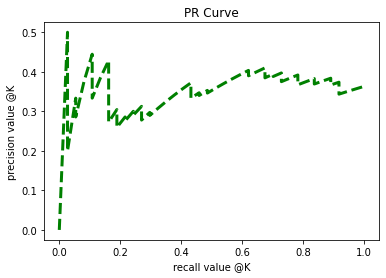

In [ ]:
#Plotting the Precision vs recall curve
import matplotlib.pyplot as plt
plt.plot(recall_value, precision_value, color='green', linestyle='dashed', linewidth = 3, markerfacecolor='blue', markersize=12)
plt.xlabel('recall value @K')
plt.ylabel('precision value @K')
plt.title('PR Curve')
plt.show()